# 1. Reading Data

In [1]:
import time
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib.legend_handler import HandlerLine2D
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid

In [2]:
df = pd.read_csv("clean_data.txt")

In [3]:
df.Malicious.value_counts(normalize=True)

0    0.833684
1    0.166316
Name: Malicious, dtype: float64

# 2. Modelling

In [4]:
X =df.T.tail(34).T
Y =df.T.head(1).T
Y=Y.astype('int')

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [6]:
#function for plotting confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

## 5.1 Supervised Modelling (Logistic Regression)

Confusion matrix, without normalization
[[1185    2]
 [   2  222]]


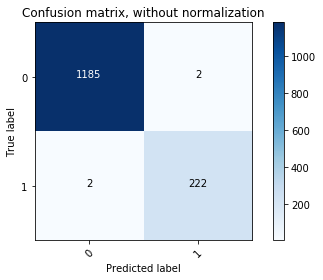

In [7]:
LR = RandomForestClassifier(n_estimators=2000, max_features=0.5).fit(X_train, y_train)
pred_y=LR.predict(X_test)
cm= confusion_matrix(y_test,pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

In [8]:
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
print(precision, recall, fpr*100, accuracy*100)

0.9910714285714286 0.9910714285714286 0.16849199663016007 99.7165131112686


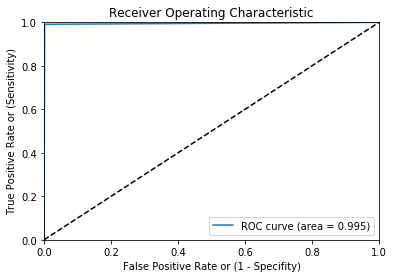

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# 5.2 Random Forest

Confusion matrix, without normalization
[[1185    2]
 [   3  221]]


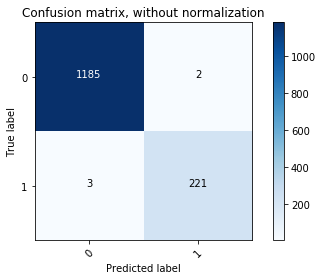

In [34]:
RF = RandomForestClassifier(n_estimators=200).fit(X_train, y_train)
pred_y=RF.predict(X_test)
cm= confusion_matrix(y_test,pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

In [35]:
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
print(precision, recall, fpr*100, accuracy*100)

0.9910313901345291 0.9866071428571429 0.16849199663016007 99.64564138908575


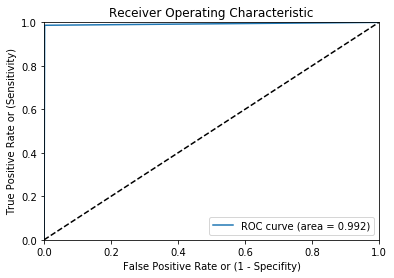

In [36]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


# Compute fpr, tpr, thresholds and roc auc
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
roc_auc = auc(fpr,tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# 5.3 Bayesian Additive Regression Trees

In [16]:
from bartpy.sklearnmodel import SklearnModel
model = SklearnModel() # Use default parameters

In [28]:
y_train_1 = y_train.values
model.fit(X_train, y_train_1) # Fit the model

SklearnModel(alpha=0.95, beta=2.0, n_burn=200, n_chains=4, n_jobs=4,
       n_samples=200, n_trees=50, p_grow=0.5, p_prune=0.5, sigma_a=0.001,
       sigma_b=0.001, store_in_sample_predictions=True, thin=0.1)

In [29]:
pred_y = model.predict(X_test) # Make predictions on new data

In [30]:
cm= confusion_matrix(y_test,pred_y)
plt.figure()
plot_confusion_matrix(cm, classes=[0,1],title='Confusion matrix, without normalization')

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [31]:
tn, fp, fn, tp = cm.ravel()
precision=tp/(tp+fp)
recall=tp/(tp+fn)
fpr = fp/(fp+ tn)
accuracy = (tp + tn)/(tn + tp + fn + fp)
print(precision, recall, fpr*100, accuracy*100)

0.9910313901345291 0.9866071428571429 0.16849199663016007 99.64564138908575


In [32]:
pred_y

array([ 1.06763352, -0.01019108, -0.01417838, ..., -0.02106035,
        0.0477016 ,  0.01944473])

In [33]:
X_train.to_csv("X_train.csv", index = None)
X_test.to_csv("X_test.csv", index = None)
y_test.to_csv("y_test.csv", index = None)
y_train.to_csv("y_train.csv", index = None)